# Python Task Optimisation and Interoperability - Subprocess Module

by Carlos Rodrigues

_@carlosmr12_

### Definition

"The __subprocess__ module allows you to __spawn new processes__, connect to their __input/output/error pipes__, and obtain their __return codes__."

### Functions
* ```subprocess.run()```:  Run the command described by args. Wait for command to complete, then return a CompletedProcess instance.[1](https://docs.python.org/3/library/subprocess.html#subprocess.run)
* ```subprocess.check_output()```: Run command with arguments and return its output. [2](https://docs.python.org/3/library/subprocess.html#subprocess.check_output)
* ```subprocess.peopen()```: Execute a child program in a new process. [3](https://docs.python.org/3/library/subprocess.html#subprocess.Popen)


### Shell commands Recap

* ```ls path_to_folder```: List information about files in a certain directory
* ```du -sh path_to_folder```: Calculates size of a directory
* ```find . ! -name 'file.txt' -type f -exec rm -f {} +```: Remove all files in current directory except for "file.txt"

### Task 1
Remove all unnecessary files from a specific folder recursively except for structure (.pdb) and sequence (.fasta) files.

Structure files are defined as:
___[four-letter-code] _ chain _ [one-letter-code].pdb___ - 1u9a_chain_A.pdb

Sequence files are defined as:
___[four-letter-code] _ chain _ [one-letter-code].fasta___ - 1u9a_chain_A.fasta

In [14]:
# IMPORT PACKAGES
import os
import subprocess

# DEFINE CONSTANTS
CURRENT_FOLDER = os.getcwd()
DATA_FOLDER = os.path.join(CURRENT_FOLDER,"data")

def organiser(folder):
    # READS ORIGINAL SIZE OF THE DATA
    original_size = subprocess.check_output(f"du -sh {folder}", shell=True)
    original_size = original_size.decode('ascii')
    # LIST ALL FOLDERS IN DATA folder
    output_ls = subprocess.check_output(f"ls {folder}", shell=True)
    # TRANSFORM TEXT OUTPUT FROM output_ls TO A PYTHON LIST
    parsed_output_ls = [item.strip().decode('ascii') for item in output_ls.split()]
    # REMOVE ALL FILES EXCEPT FOR FILES WITH THE FOLLOWING NAME PDBCODE_chain_CHAIN.fasta and PDBCODE_chain_CHAIN.pdb
    for entry in parsed_output_ls:
        pdb_code = entry.split("_")[0]
        chain = entry.split("_")[1]    
        subprocess.run(f"find {folder}/{pdb_code}_{chain} ! \\( -name '{pdb_code}_chain_{chain}.fasta' -o -name '{pdb_code}_chain_{chain}.pdb' \\) -type f -exec rm -f {{}} +", shell=True)
    # READS SIZE OF folder AFTER REMOVING UNWANTED FILES
    final_size = subprocess.check_output(f"du -sh {folder}", shell=True)
    final_size = final_size.decode('ascii')
   
    print(f"Before: {original_size}")
    print(f"After: {final_size}")
    shrinking_percentage = round(100-(float(final_size.split("\t")[0][:-1])*100)/float(original_size.split("\t")[0][:-1]),3)
    print(f"Folder has now {shrinking_percentage}% less data")
    return True

In [4]:
organiser(DATA_FOLDER)

Before: 128M	/home/chmrodrigues/Documents/resbazapp/data

After: 8.5M	/home/chmrodrigues/Documents/resbazapp/data

Total folder has now 93.359% less data


True

### Task 2
Plot size of files to identify possibly the "biggest protein".

[Seaborn](https://seaborn.pydata.org/)

In [5]:
# IMPORT PACKAGES
import matplotlib.pyplot as plt
import seaborn as sns

def plot_data_size(folder):
    # LIST ALL FOLDERS IN DATA folder
    output_ls = subprocess.check_output(f"ls {folder}", shell=True)
    # TRANSFORM TEXT OUTPUT FROM output_ls TO A PYTHON LIST
    parsed_output_ls = [item.strip().decode('ascii') for item in output_ls.split()]
    
    # POPULATE DICTIONARY WITH FOLDER NAME AND SIZE
    folder_size_dict = dict()
    for entry in parsed_output_ls:
        pdb_code = entry.split("_")[0]
        chain = entry.split("_")[1]
    
        pdb_file = os.path.join(folder,entry,f"{pdb_code}_chain_{chain}.pdb")
        folder_size = subprocess.check_output(f"ls -lh {pdb_file}", shell=True)
        folder_size_dict[entry] = float(folder_size.decode("ascii").split()[4][:-1])
    
    # PLOT FILE SIZES
    plt.figure(figsize=(9,7), dpi=300)
    sns.barplot(x=list(folder_size_dict.keys()), y=list(folder_size_dict.values()))
    # ROTATE LABELS ON AXIS X
    plt.xticks(rotation=90)
    return True

True

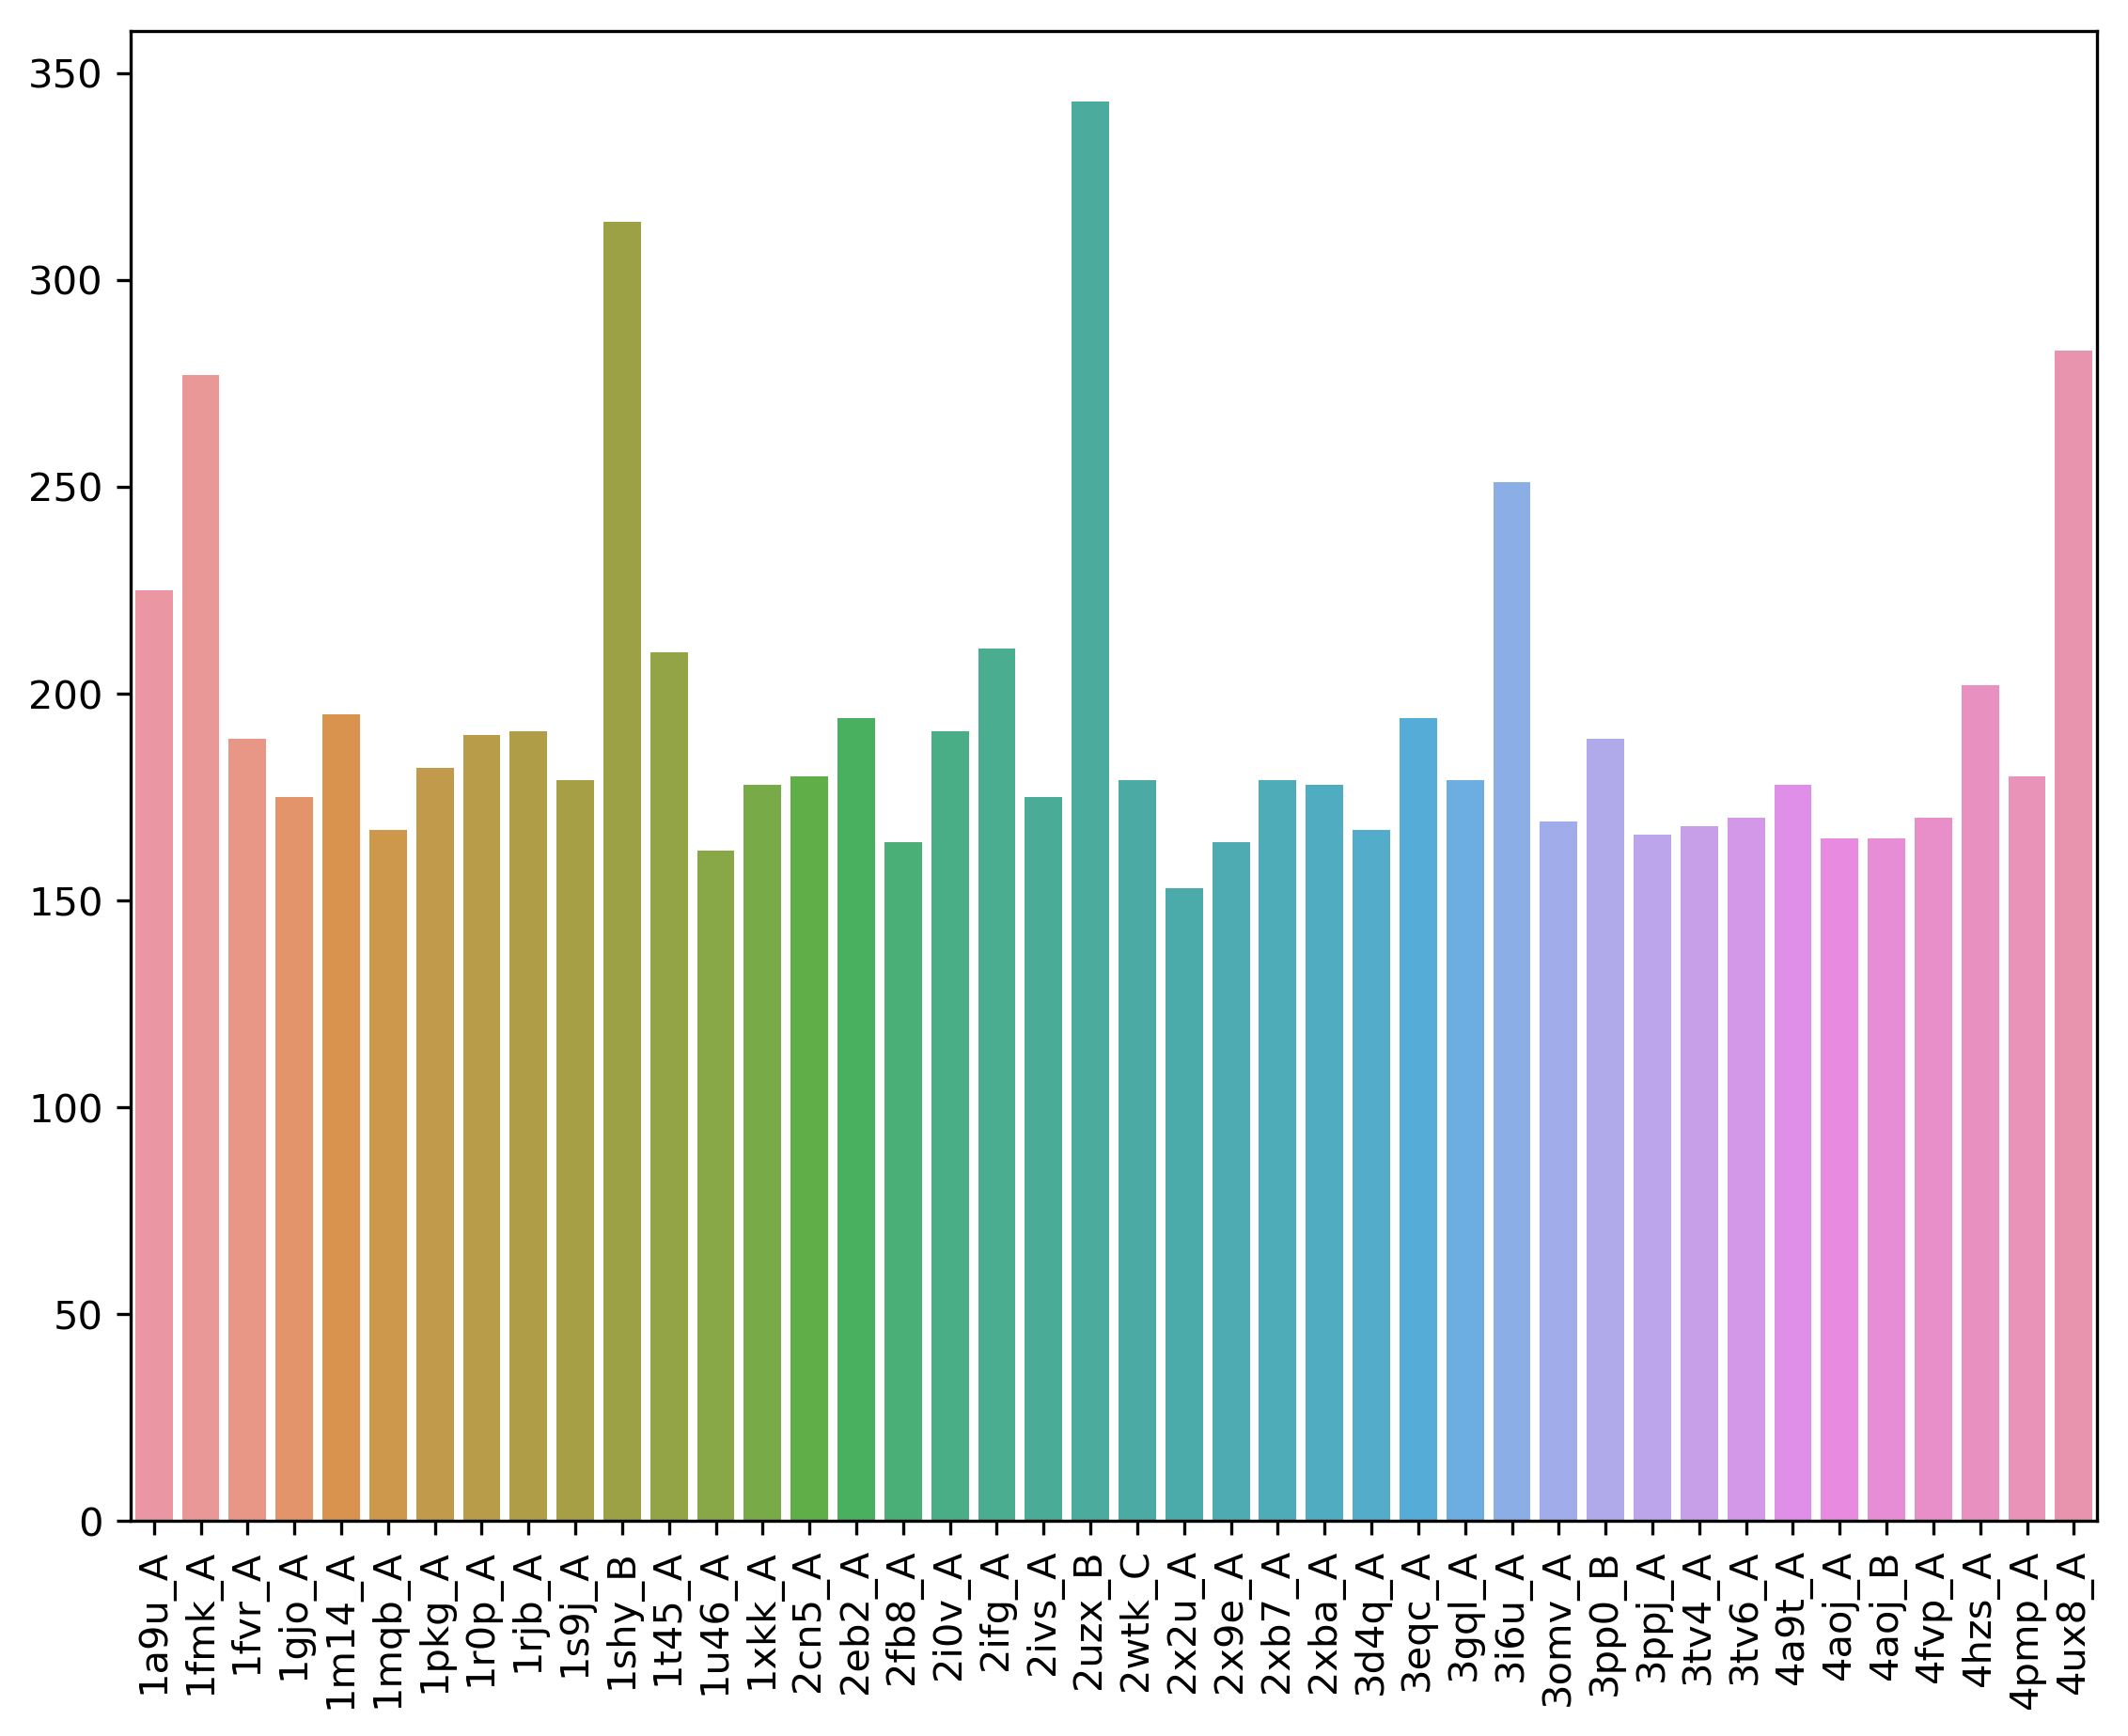

In [6]:
plot_data_size(DATA_FOLDER)

In [12]:
# 2uzx_chain_B.fasta
top1 = "QLPNFTAETPIQNVILHEHHIFLGATNYIYVLNEEDLQKVAEYKTGPVL\
    EVWKDNINMALVVDTYYDDQLISCGSVNRGTCQRHVFPHNHSEVHCIFSEPSQ\
    CPDCVVSALGAKVLSSVKDRFINFFVGNTINSSYPLHSISVRRLKETKDGFMF\
    LTDQSYIDVLPEFRDSYPIKYVHAFESNNFIYFLTVQRETLDAQTFHTRIIRF\
    CSINSGLHSYMEMPLECILTKEVFNILQAAYVSKPGAQLARQIGASLNDDILF\
    AVFAQSKPDSAEPMDRSAMCAFPIKYVNDFFNKINVRCLQHFYGPNDEYRTEF\
    TTALQRVDLFMGQFSEVLLTSISTFIKGDLTIANLGTSEGRFMQVVVSRSGPS\
    TPHVNFLLDSHPVSPEVIVEHTLNQNGYTLVITGKKITKIPLNGLGCRHFQSC\
    SQCLSAPPFVQCGWCHDKCVRSEECLSGTWTQQICLPAIYKVFPNSAPLEGGT\
    RLTICGWDFGFRRNNKFDLKKTRVLLGNESCTLTLSESTMNTLKCTVGPFNMS\
    IIISNGHGTTQYSTFSYVDPV"

print(f"Sequence length: {len(top1)}")


Sequence length: 587


In [13]:
# 2x2u_chain_A.fasta
bottom1 = "LYFSRDAYWEKLYVDQAAGTPLLYVHALRDAPEEVPSFRLGQHLYGT\
    YRTRLHENNWIRIQEDTGLLYLQRSLDHSSWEKLSVRNRGFPLLTVYLKVFLSE\
    CQWPGCARVYFSFFNTSFPACSSLKPRELCFPETRPSFRIRENRPPGTFHQFRL\
    LPVQFLCPQISVAYRLLEGEGLPFRSAPDSLEVSTRWALDREQREKYELVAVCT\
    VHREEVVMVPFPVTVYDEDDSAPEFEN"

print(f"Sequence length: {len(bottom1)}")


Sequence length: 252


<img src="two_proteins.png">

### Task 3

Run R script to calculation the deformation energy of a 3D structure using the following parameters. The script is under the folder __src__.

```
Rscript src/run_deformation.R protein_structure.pdb A 187
```

In [9]:
CURRENT_FOLDER = os.getcwd()
CODE_FOLDER = os.path.join(CURRENT_FOLDER,"src")

def run_deformation(pdb_file, chain, residue_number):
    deformation_energy_score = subprocess.check_output(f"Rscript {CODE_FOLDER}/run_deformation.R {pdb_file} {residue_number} {chain} calpha", shell=True)
    return deformation_energy_score.decode("ascii").split("\n")[-1]

In [11]:
print(run_deformation("data/1a9u_A/1a9u_chain_A.pdb", "A", 351))
print(run_deformation("data/1a9u_A/1a9u_chain_A.pdb", "A", 349))
print(run_deformation("data/1a9u_A/1a9u_chain_A.pdb", "A", 8))
print(run_deformation("data/1a9u_A/1a9u_chain_A.pdb", "A", 51))

23.64189
16.97021
8.752666
11.64425
